# Recitation 1: Tuning Hyperparameter using Cross-Validation
Link: https://learning.edx.org/course/course-v1:MITx+6.86x+1T2025/block-v1:MITx+6.86x+1T2025+type@sequential+block@r1_regularization_crossvalidation/block-v1:MITx+6.86x+1T2025+type@vertical+block@r1_regularization_crossvalidation-tab1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [4]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training Labels (malignant = '0', benign = '1')
X = cancer_data.data # 30 attributes 

In [6]:
X = preprocessing.scale(X) # scale each attribute to zero-mean and unit variance

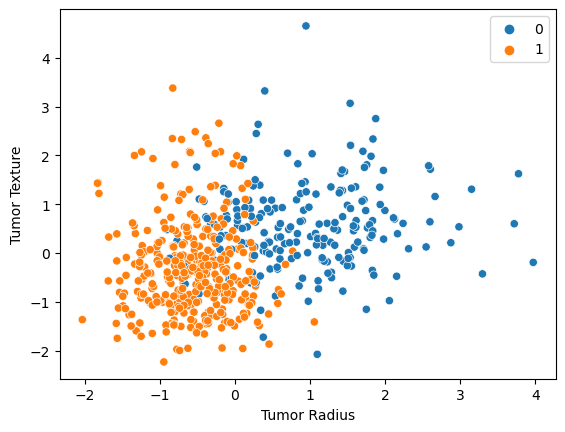

In [8]:
# Plot the first two attributes of the training points
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.xlabel("Tumor Radius")
plt.ylabel("Tumor Texture")
plt.grid=True
plt.show()

In [11]:
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # init validation scores for each alpha

for i in range(len(alpha)): # for each alpha value
    # setup SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    
    # calculate cross-validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean() # calculate mean of the 5 scores

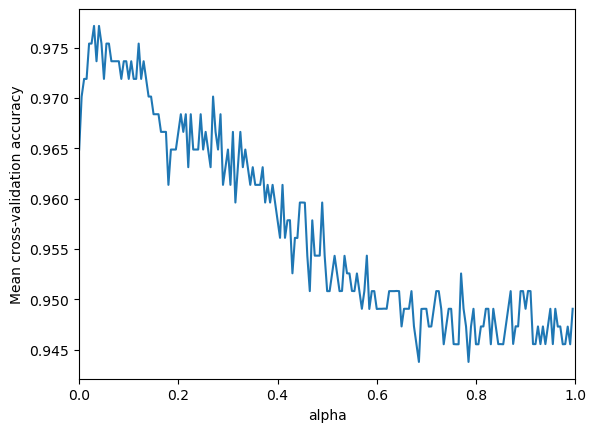

In [13]:
# plot how cross validation scores change with alpha
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid = True
plt.show()

alpha_star =  0.030000000000001


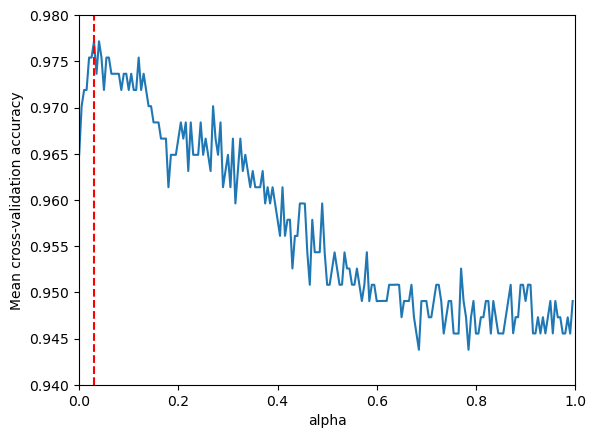

In [15]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print("alpha_star = ",alpha_star)

plt.plot(alpha, val_scores)
#plt.plot(np.ones(11)*alpha_star, np.arange(0,1.1,0.1),"--r")
plt.axvline(x=alpha_star, linestyle = "--", color = "r")
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid = True
plt.show()

In [16]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)

model_trained = model_star.fit(X,y)
print('Training accuracy =',model_trained.score(X,y))


Training accuracy = 0.9824253075571178


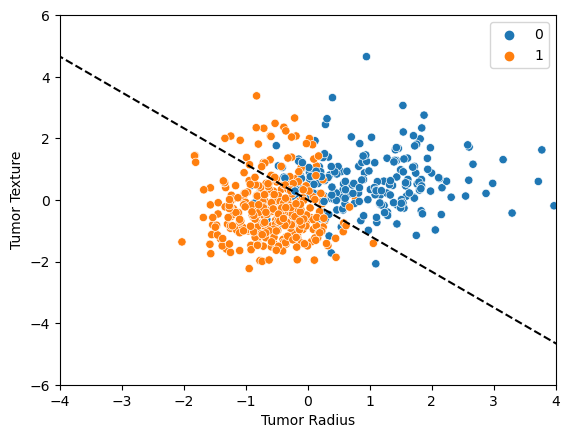

In [18]:
# plot decision boundary of trained model
slope = model_trained.coef_[0,1] / -model_trained.coef_[0,0]
x1 = np.arange(-10, 10, 0.5)
y1 = slope*x1

sns.scatterplot(x=X[:,0], y=X[:,1], hue = y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid = True
plt.show()